# Projeto 1 - Backtest modelo de investimento Magic Formula.


### Desafio:

* Testar se a regra de investimento da fórmula mágica, do Joel Grenblatt, funcionou no Brasil nos últimos anos.


### Passo a passo:

   **1** - Importar os módulos e bibliotecas.
   
   **2** - Baixar os dados disponibilizados.
   
   **3** - Calcular os retornos mensais das empresas
   
   **4** - Filtrar  a liquidez.
   
   **5** - Criar o ranking dos indicadores.
   
   **6** - Criar as carteiras. 
   
   **7** - Calcular a rentabilidade por carteira.
   
   **8** - Calcular a rentabilidade do modelo.

   **9** - Calcular a rentabilidade do ibovespa no mesmo período.

   
   ##### **10** - Analisar os resultados.
   
-------------------

# 1: Importando os módulos necessários

In [21]:
import pandas as pd
import quantstats as qs
import matplotlib.pyplot as plt

# 2: Baixar os dados dispobinilizados.

In [57]:
dados_empresas = pd.read_csv('dados_empresas.csv')

dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic
0,2016-12-31,AALR3,14.45,5375545.0,0.087853,0.058904
1,2017-01-31,AALR3,13.75,3116406.0,0.051572,0.058904
2,2017-02-28,AALR3,12.56,3077805.0,0.055183,0.058904
3,2017-03-31,AALR3,15.41,3141709.0,0.047811,0.055171
4,2017-04-30,AALR3,18.32,6444929.0,0.041178,0.055171
...,...,...,...,...,...,...
50251,2024-02-29,ZAMP3,4.17,1904103.0,0.049875,0.027474
50252,2024-03-31,ZAMP3,3.39,3412842.0,0.061509,0.032287
50253,2024-04-30,ZAMP3,3.86,3093860.0,0.056943,0.032287
50254,2024-05-31,ZAMP3,3.15,1874658.0,0.064136,0.032287


# 3: Calcular os retornos mensais das empresas.

In [58]:
dados_empresas['retorno'] = dados_empresas.groupby('ticker')['preco_fechamento_ajustado'].pct_change()

dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno
0,2016-12-31,AALR3,14.45,5375545.0,0.087853,0.058904,NaN
1,2017-01-31,AALR3,13.75,3116406.0,0.051572,0.058904,-0.048443
2,2017-02-28,AALR3,12.56,3077805.0,0.055183,0.058904,-0.086545
3,2017-03-31,AALR3,15.41,3141709.0,0.047811,0.055171,0.226911
4,2017-04-30,AALR3,18.32,6444929.0,0.041178,0.055171,0.188838
...,...,...,...,...,...,...,...
50251,2024-02-29,ZAMP3,4.17,1904103.0,0.049875,0.027474,-0.162651
50252,2024-03-31,ZAMP3,3.39,3412842.0,0.061509,0.032287,-0.187050
50253,2024-04-30,ZAMP3,3.86,3093860.0,0.056943,0.032287,0.138643
50254,2024-05-31,ZAMP3,3.15,1874658.0,0.064136,0.032287,-0.183938


In [59]:
dados_empresas['retorno'] = dados_empresas.groupby('ticker')['retorno'].shift(-1)

dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno
0,2016-12-31,AALR3,14.45,5375545.0,0.087853,0.058904,-0.048443
1,2017-01-31,AALR3,13.75,3116406.0,0.051572,0.058904,-0.086545
2,2017-02-28,AALR3,12.56,3077805.0,0.055183,0.058904,0.226911
3,2017-03-31,AALR3,15.41,3141709.0,0.047811,0.055171,0.188838
4,2017-04-30,AALR3,18.32,6444929.0,0.041178,0.055171,-0.045306
...,...,...,...,...,...,...,...
50251,2024-02-29,ZAMP3,4.17,1904103.0,0.049875,0.027474,-0.187050
50252,2024-03-31,ZAMP3,3.39,3412842.0,0.061509,0.032287,0.138643
50253,2024-04-30,ZAMP3,3.86,3093860.0,0.056943,0.032287,-0.183938
50254,2024-05-31,ZAMP3,3.15,1874658.0,0.064136,0.032287,0.187302


# 4: Filtrar a liquidez.

In [60]:
dados_empresas = dados_empresas[dados_empresas['volume_negociado'] > 1000000]

# 5: Criar o ranking dos indicadores.

In [70]:
dados_empresas.loc[:, 'ranking_ev_ebit'] = dados_empresas.groupby('data')['ebit_ev'].rank(ascending=False)
dados_empresas.loc[:, 'ranking_roic'] = dados_empresas.groupby('data')['roic'].rank(ascending=False)

dados_empresas.loc[:, 'ranking_final'] = dados_empresas['ranking_ev_ebit'] + dados_empresas['ranking_roic']
dados_empresas.loc[:, 'ranking_final'] = dados_empresas.groupby('data')['ranking_final'].rank()

dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ev_ebit,ranking_roic,ranking_final
563,2016-07-31,AGRO3,7.08,1367216.0,0.222828,0.154424,-0.052260,2.0,8.0,3.5
588,2018-08-31,AGRO3,8.65,1686357.0,0.163671,0.130726,-0.053179,5.0,10.0,9.0
593,2019-01-31,AGRO3,10.16,1254681.0,0.251466,0.210253,-0.013780,2.0,5.0,3.0
595,2019-03-31,AGRO3,9.83,8890526.0,0.252551,0.207867,-0.003052,1.0,3.0,2.0
598,2019-06-30,AGRO3,10.49,5485742.0,0.173807,0.152416,0.005720,7.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...
50001,2024-02-29,WIZC3,6.02,2185709.0,0.355313,0.227289,0.166113,1.0,4.0,1.0
50002,2024-03-31,WIZC3,7.02,21525465.0,0.363341,0.217309,-0.011396,2.0,6.0,3.0
50003,2024-04-30,WIZC3,6.94,3375745.0,0.378248,0.217309,-0.142651,1.0,6.0,2.0
50004,2024-05-31,WIZC3,5.95,2538401.0,0.520612,0.225720,-0.040336,1.0,3.0,1.0


In [62]:
dados_empresas[dados_empresas['data'] == '2023-01-31'].sort_values('ranking_final').head(15)

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ev_ebit,ranking_roic,ranking_final
43502,2023-01-31,SYNE3,4.21,1.671497e+06,1.246897,0.395648,-0.052257,3.0,5.0,1.0
47672,2023-01-31,UNIP3,65.97,3.383146e+06,0.386764,0.530372,-0.036683,14.5,2.5,2.5
47950,2023-01-31,UNIP6,72.34,1.675475e+07,0.386764,0.530372,-0.070915,14.5,2.5,2.5
43872,2023-01-31,TASA4,15.08,1.627278e+07,0.388092,0.380011,-0.135279,13.0,6.0,4.0
34873,2023-01-31,PETR4,18.43,1.400647e+09,0.473836,0.317265,-0.031470,11.5,8.5,6.5
34734,2023-01-31,PETR3,21.42,4.006402e+08,0.473836,0.317265,-0.023810,11.5,8.5,6.5
21945,2023-01-31,GOAU4,12.41,1.120145e+08,1.066122,0.251230,-0.131346,4.5,15.5,6.5
21806,2023-01-31,GOAU3,11.74,1.593439e+06,1.066122,0.251230,-0.180579,4.5,15.5,6.5
19975,2023-01-31,FESA4,13.41,1.188523e+07,0.283234,0.328078,0.013423,18.0,7.0,9.0
26299,2023-01-31,KEPL3,10.02,1.742221e+07,0.252379,0.456268,-0.144711,24.0,4.0,10.0


# 6: Criar  as carteiras. 

In [64]:
dados_empresas = dados_empresas[dados_empresas['ranking_final'] <= 10]

dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ev_ebit,ranking_roic,ranking_final
563,2016-07-31,AGRO3,7.08,1367216.0,0.222828,0.154424,-0.052260,2.0,18.0,5.5
588,2018-08-31,AGRO3,8.65,1686357.0,0.163671,0.130726,-0.053179,8.0,32.0,10.0
593,2019-01-31,AGRO3,10.16,1254681.0,0.251466,0.210253,-0.013780,3.0,9.0,4.0
595,2019-03-31,AGRO3,9.83,8890526.0,0.252551,0.207867,-0.003052,2.0,7.0,2.0
598,2019-06-30,AGRO3,10.49,5485742.0,0.173807,0.152416,0.005720,9.0,22.0,5.0
...,...,...,...,...,...,...,...,...,...,...
50001,2024-02-29,WIZC3,6.02,2185709.0,0.355313,0.227289,0.166113,4.0,7.0,1.0
50002,2024-03-31,WIZC3,7.02,21525465.0,0.363341,0.217309,-0.011396,4.0,15.0,3.0
50003,2024-04-30,WIZC3,6.94,3375745.0,0.378248,0.217309,-0.142651,4.0,14.0,2.0
50004,2024-05-31,WIZC3,5.95,2538401.0,0.520612,0.225720,-0.040336,2.0,12.0,2.0


# 7: Calcular a rentabilidade por carteira.

In [65]:
rentabilidade_por_carteiras = dados_empresas.groupby('data')['retorno'].mean()
rentabilidade_por_carteiras = rentabilidade_por_carteiras.to_frame()

rentabilidade_por_carteiras

,retorno
data,
2012-12-31,-0.052051
2013-01-31,0.019020
2013-02-28,0.011480
2013-03-31,0.047786
2013-04-30,0.018336
...,...
2024-02-29,-0.017760
2024-03-31,-0.038745
2024-04-30,-0.027068


# 8: Calcular a rentabilidade do modelo.

In [66]:
rentabilidade_por_carteiras['Magic Formula'] = (rentabilidade_por_carteiras['retorno'] + 1).cumprod() - 1

rentabilidade_por_carteiras = rentabilidade_por_carteiras.shift(1)

rentabilidade_por_carteiras = rentabilidade_por_carteiras.dropna()

# 9: Calcular a rentabilidade do ibovespa no mesmo período.

In [67]:
ibov = pd.read_csv('ibov.csv')

retornos_ibov = ibov['fechamento'].pct_change().dropna()
retorno_acum_ibov = (1 + retornos_ibov).cumprod() - 1
rentabilidade_por_carteiras['Ibovespa'] = retorno_acum_ibov.values
rentabilidade_por_carteiras = rentabilidade_por_carteiras.drop('retorno', axis = 1)

# 10: Analisar os resultados.

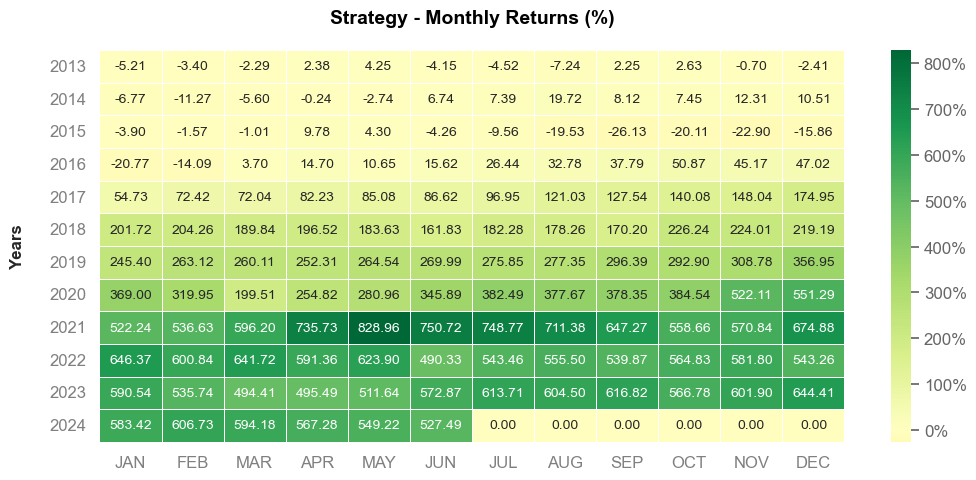

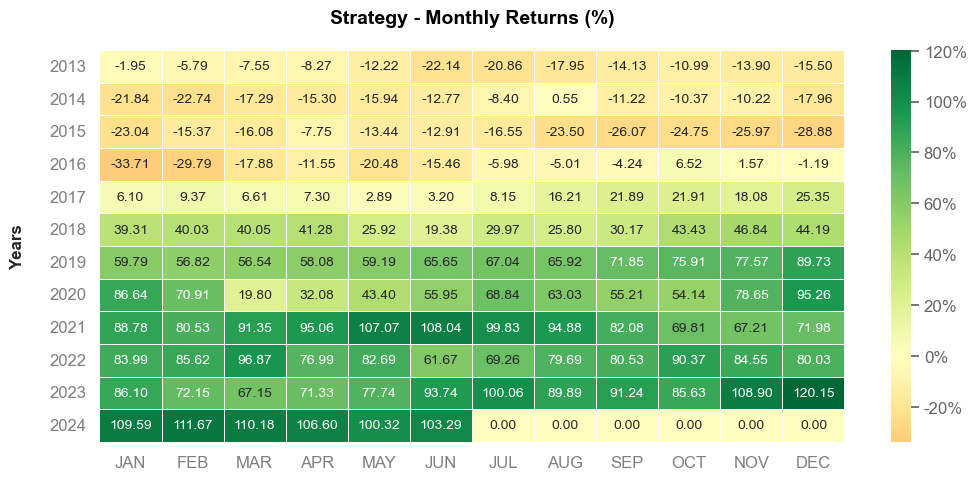

In [84]:
qs.extend_pandas()
rentabilidade_por_carteiras.index = pd.to_datetime(rentabilidade_por_carteiras.index)

rentabilidade_por_carteiras['Magic Formula'].plot_monthly_heatmap()
rentabilidade_por_carteiras['Ibovespa'].plot_monthly_heatmap()

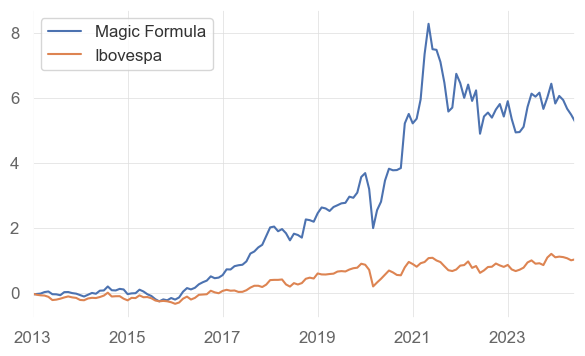

In [69]:
rentabilidade_por_carteiras.plot(figsize = (7, 4))

plt.gca().set_xlabel('')
plt.show()